In [1]:
from PyCol.col import COL
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

UNITY_EXE = "./unix/COL.x86_64"
LOG_DIR   = "./logs"

config = {
    'IMG_SIZE': 512,
    'speed_factor': 1,
    'spawn_pedestrians': 0,
    'spawn_cars': 0,
    'move_speed': 2,
    'turn_speed': 0.015,
    'vertical_speed': 1,
    'momentum': 0,
    'fixedDeltaTime': 0.0005,#0.02,#0.0005,
    'number_of_steps': 1,
    'rgb_camera': 1,
    'depth_camera': 1,
    'normals_camera': 1,
    'semantic_camera': 1,
    'vertical_fov': 90,
    'start_x': -2528.0,
    'start_y': 0.1,
    'start_z': -74.0,
    'launch_streaming': 0,
    'render': 0,
}
#UNITY_EXE = None #for launching from unity editor
BATCH_MODE = True #don't display Unity's window
col = COL(UNITY_EXE, LOG_DIR, config,batch_mode = BATCH_MODE)
ok = col.launch()

if ok:
    frames = col.extract_visual_frames()
    px, py, pz, rx, ry, rz = col.extract_xyz()

col.promote_chunk(557)

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-allocator-temp-initial-block-size-main=262144"
    "memorysetup-allocator-temp-initial-block-size-worker=262144"
    "memorysetup-temp-allocator-size-background-worker=32768"
    "memorysetup-temp-allocator-size-job-worker=262144"
    "memorysetup-temp-allocator-size-preload-manager=262144"
    "memorysetup-temp-allocator-size-nav-mesh-worker=65536"
    "memorysetup-temp-allocator-size-audio-worker=65536"
    "memorysetup-temp-allocator-size-cloud-worker=32768"
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cac

-2528.0 19.5 -69.60012817382812


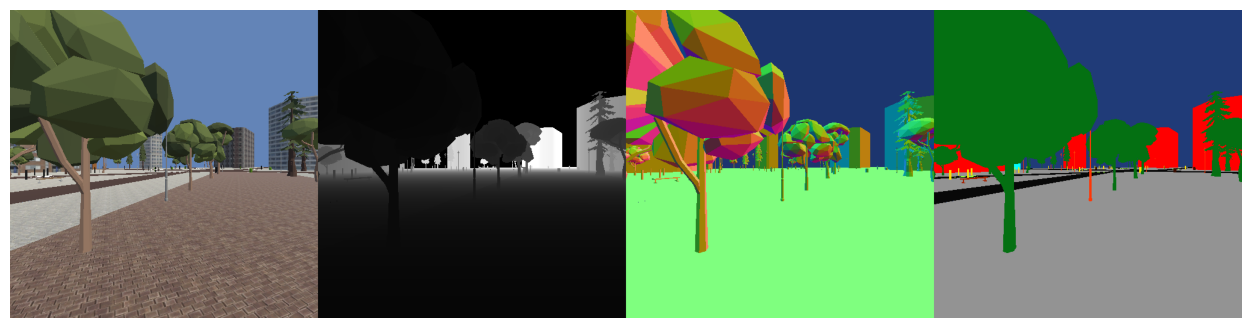

In [32]:
from tqdm import tqdm
import time
fwd, turn, vert, grav = 0,0,0,0

col.write_action_until_frame(fwd,turn,vert,grav)
x,y,z,_,yaw,_ = col.extract_xyz()
time.sleep(0.1)

rgb, depth, normals, sem = col.extract_visual_frames()
rendering = np.concatenate([rgb,depth,normals,sem],axis=1)
print(x,yaw,z)
plt.figure(figsize=(18, 4))
plt.imshow(rendering)
plt.axis("off")
plt.show()



# Fast FPS Sanity Check (with frame copy)

In [33]:
import time
import numpy as np
from tqdm import tqdm

fwd, turn, vert, grav = 0, 1, 0, 0

n_runs = 5
n_steps = 200
fps_list = []
rgb_frames = []
for r in range(n_runs):
    t0 = time.perf_counter()
    for _ in tqdm(range(n_steps), desc=f"Run {r+1}/{n_runs}", leave=False):
        col.write_action_until_frame(fwd, turn, vert, grav)
        rgb_frames.append(frames[0])
    dt = time.perf_counter() - t0
    fps = n_steps / dt
    fps_list.append(fps)

avg_fps = float(np.mean(fps_list))
std_fps = float(np.std(fps_list))

print("FPS per run:", [round(x, 2) for x in fps_list])
print(f"Average FPS over {n_runs} runs: {avg_fps:.2f} ± {std_fps:.2f} it/s")
#


FPS per run: [140.07, 183.16, 176.02, 194.95, 170.93]
Average FPS over 5 runs: 173.02 ± 18.35 it/s
